In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv('avocado.csv')

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
data.drop(data.columns[0],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [25]:
data.isna().sum()

AveragePrice    0
Total Volume    0
Total Bags      0
type            0
region          0
Year            0
Month           0
Date            0
dtype: int64

In [6]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [8]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [9]:
#once the data is processed we'll check for skewness once again and if its still present then we will treat it

In [10]:
#we'll divide the date column into 3 columns(year,month and day)to remove the object data type column and to avoid duplicate columns
data['Year'], data['Month'], data['Day'] = data['Date'].str.split('-').str
data.drop(columns=['Date','year'], inplace=True)
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [11]:
data['Year']=data['Year'].astype(int)
data['Month']=data['Month'].astype(int)
data['Date']=data['Day'].astype(int)
data.drop(columns=['Day'], inplace=True)
data


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


# Visualization

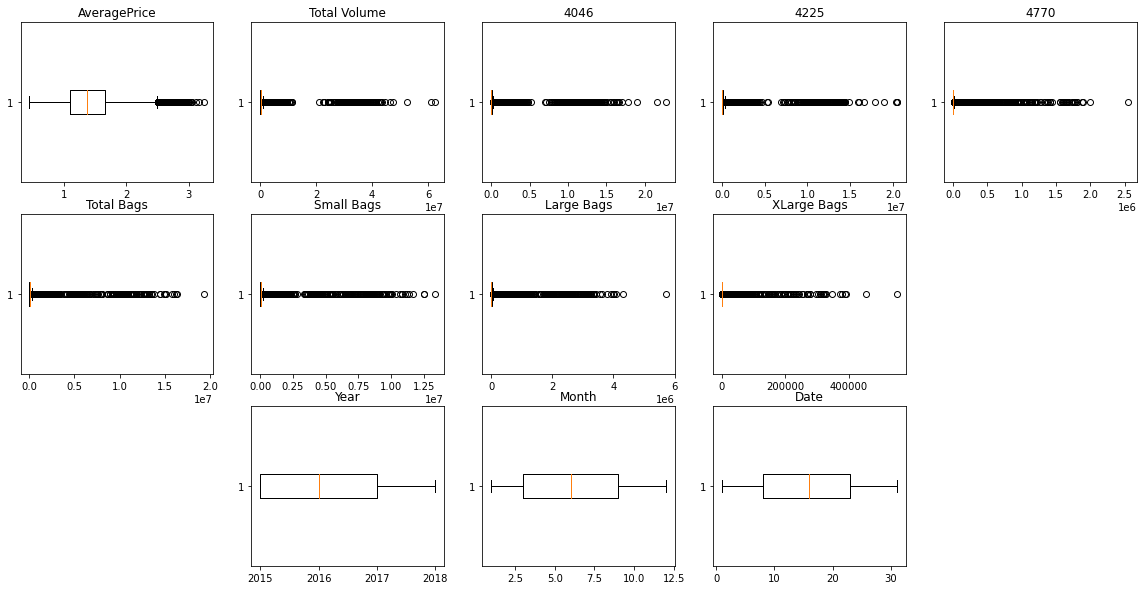

In [12]:
#checking for outliers
plt.figure(figsize=(20,10))
for i in range(len(data.columns)):
    if data.dtypes[i] != 'object':
        plt.subplot(3, 5, i + 1)
        plt.boxplot(data[data.columns[i]], vert=False)
        plt.title(data.columns[i])
plt.show()

In [13]:
#no need to worry about outliers

conventional    9126
organic         9123
Name: type, dtype: int64


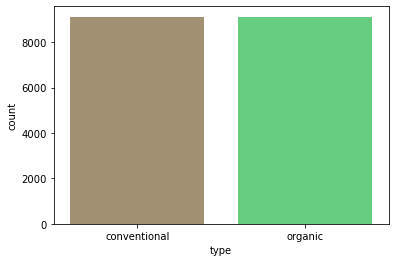

In [14]:
print(data['type'].value_counts())
sns.countplot(x='type', data= data, palette="terrain_r")
plt.show()


2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


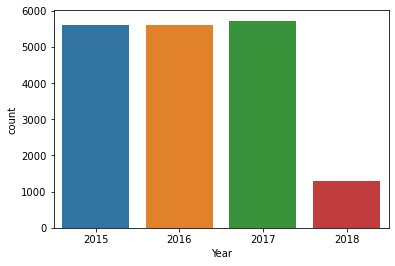

In [15]:
print(data['Year'].value_counts())
sns.countplot(x='Year', data=data)
plt.show()

1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


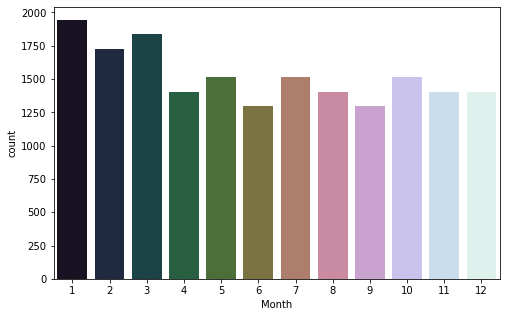

In [16]:
print(data['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=data, palette="cubehelix")
plt.show()

11    756
4     756
18    755
25    755
8     648
12    648
24    648
1     648
26    648
22    648
5     648
19    648
3     648
15    648
17    648
10    648
27    540
28    540
7     540
14    540
29    540
21    540
20    540
13    540
6     539
30    432
16    432
9     432
23    432
2     432
31    432
Name: Date, dtype: int64


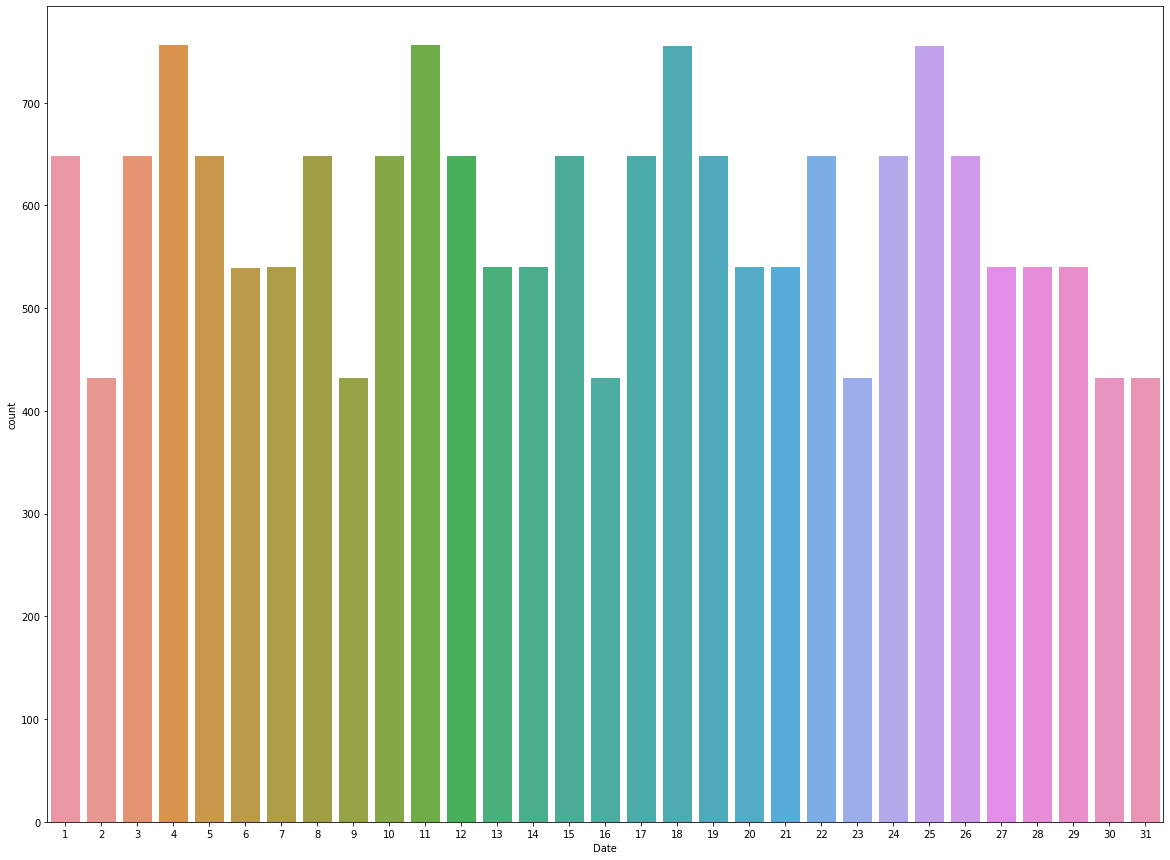

In [17]:
print(data['Date'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Date', data=data)
plt.show()

SouthCentral           338
GreatLakes             338
SanFrancisco           338
LosAngeles             338
Nashville              338
PhoenixTucson          338
Midsouth               338
RaleighGreensboro      338
Atlanta                338
Pittsburgh             338
Southeast              338
HartfordSpringfield    338
Orlando                338
HarrisburgScranton     338
Columbus               338
TotalUS                338
Roanoke                338
Jacksonville           338
StLouis                338
CincinnatiDayton       338
Louisville             338
Indianapolis           338
Boston                 338
NorthernNewEngland     338
California             338
Northeast              338
Houston                338
Detroit                338
Tampa                  338
SanDiego               338
Albany                 338
GrandRapids            338
RichmondNorfolk        338
West                   338
BuffaloRochester       338
MiamiFtLauderdale      338
Chicago                338
P

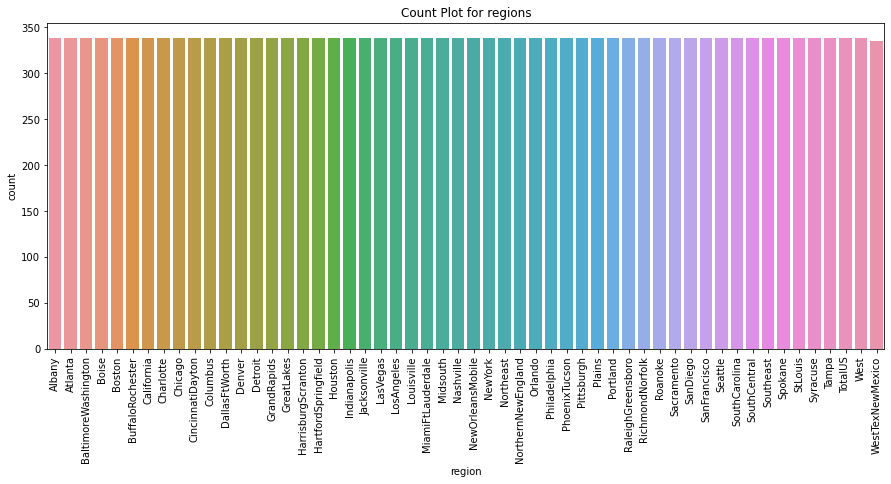

In [18]:
print(data['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(data['region'], data=data)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

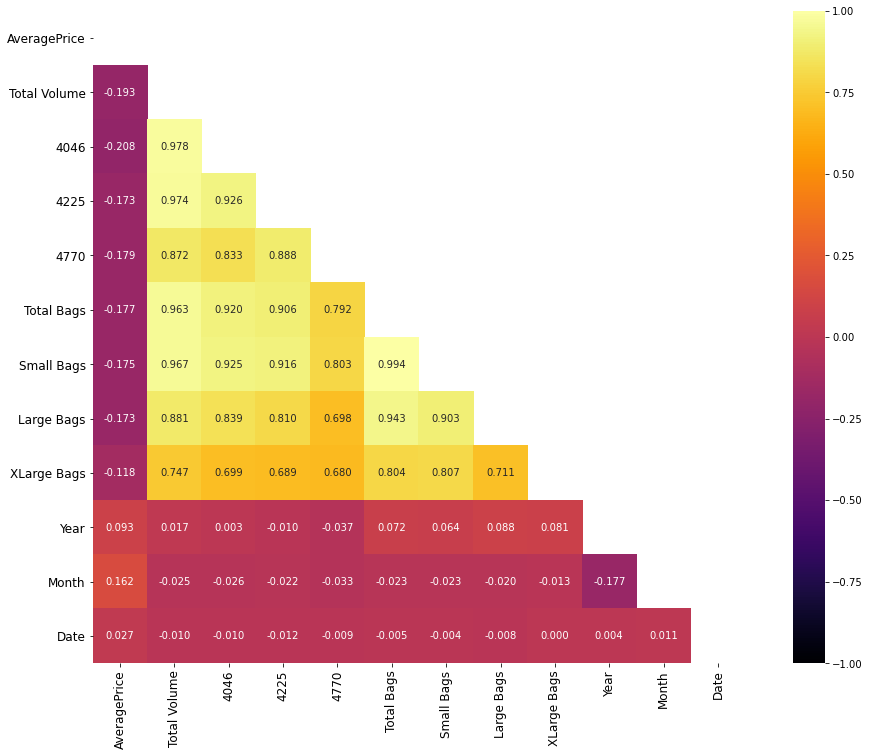

In [19]:
upper_triangle = np.triu(data.corr())
plt.figure(figsize=(17,12))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [20]:
#multivariate analysis:There is multicolinearity present in the columns,to sort this out we'll drop unnecessary columns

In [21]:
data.drop(["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)

In [22]:
data

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Date
0,1.33,64236.62,8696.87,conventional,Albany,2015,12,27
1,1.35,54876.98,9505.56,conventional,Albany,2015,12,20
2,0.93,118220.22,8145.35,conventional,Albany,2015,12,13
3,1.08,78992.15,5811.16,conventional,Albany,2015,12,6
4,1.28,51039.60,6183.95,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,9264.84,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,9394.11,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,10969.54,organic,WestTexNewMexico,2018,1,14


# Encoding

In [26]:
oe = OrdinalEncoder()
data['region']=oe.fit_transform(data['region'].values.reshape(-1,1))
data['type']=oe.fit_transform(data['type'].values.reshape(-1,1))
data

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Date
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


In [29]:
z = np.abs(zscore(data))
threshold = 3
data1 = data[(z<3).all(axis = 1)]

print ("Shape before removing outliers: ", data.shape)
print ("Shape after removing outliers: ", data1.shape)
print ("Percentage of data loss: ", (data.shape[0]-data1.shape[0])/data.shape[0]*100)

data=data1.copy()

Shape before removing outliers:  (18249, 8)
Shape after removing outliers:  (17931, 8)
Percentage of data loss:  1.7425612362321221


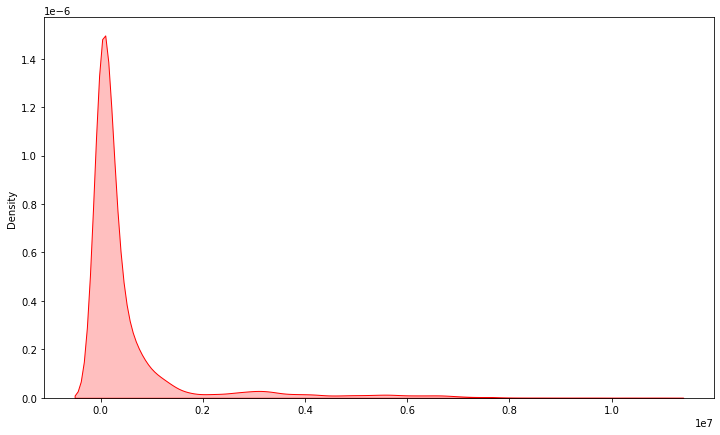

In [31]:
plt.figure(figsize=(12,7))
sns.distplot(x=data["Total Volume"], hist=False, color="r", kde_kws={"shade": True})
plt.show()

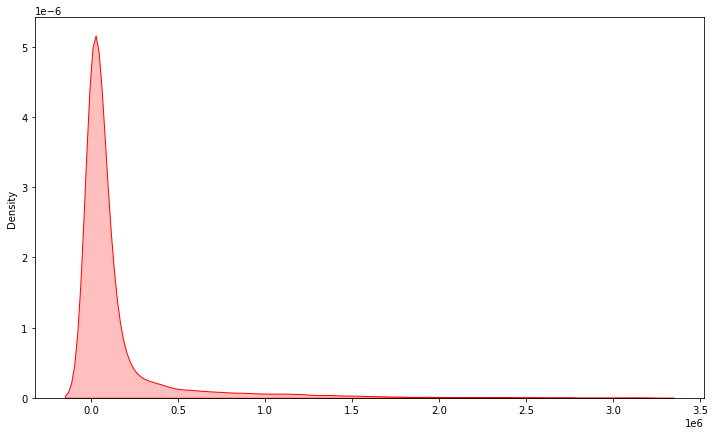

In [32]:
plt.figure(figsize=(12,7))
sns.distplot(x=data["Total Bags"], hist=False, color="r", kde_kws={"shade": True})
plt.show()

# Splitting and Scaling

In [ ]:
X = data.drop('AveragePrice', axis=1)
Y = data['AveragePrice']

In [34]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Total Volume,Total Bags,type,region,Year,Month,Date
0,-0.396584,-0.413139,-1.00296,-1.694204,-1.215795,1.650340,1.291781
1,-0.404396,-0.410836,-1.00296,-1.694204,-1.215795,1.650340,0.493909
2,-0.351527,-0.414710,-1.00296,-1.694204,-1.215795,1.650340,-0.303964
3,-0.384268,-0.421359,-1.00296,-1.694204,-1.215795,1.650340,-1.101837
4,-0.407599,-0.420297,-1.00296,-1.694204,-1.215795,1.367566,1.519745
5,-0.403475,-0.418873,-1.00296,-1.694204,-1.215795,1.367566,0.721872
6,-0.380545,-0.414216,-1.00296,-1.694204,-1.215795,1.367566,-0.076001
7,-0.358865,-0.418459,-1.00296,-1.694204,-1.215795,1.367566,-0.873873
8,-0.366892,-0.405473,-1.00296,-1.694204,-1.215795,1.367566,-1.671746
9,-0.388152,-0.413341,-1.00296,-1.694204,-1.215795,1.084793,1.063818


In [35]:
#finding best random state for building regression models
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
        
print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.4555521042103937 on Random State 948


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=948)

In [37]:
#Regression Model Function

In [39]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=948)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score", result)

In [40]:
model=LinearRegression()
reg(model, X, Y)

RMSE Score: 0.29731415248586285
R2 Score: 43.048791198000906
Cross Validation Score: 3.1606400668191355
R2 Score - Cross Validation Score 39.88815113118177


In [41]:
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score: 0.2973766446179112
R2 Score: 43.02484765907147
Cross Validation Score: 3.42456496230676
R2 Score - Cross Validation Score 39.60028269676471


In [42]:
model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score: 0.39412850641568486
R2 Score: -0.08004140738024912
Cross Validation Score: -116.71934809126752
R2 Score - Cross Validation Score 116.63930668388727


In [43]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score: 0.2996153930804249
R2 Score: 42.16376345851224
Cross Validation Score: -10.7528537921228
R2 Score - Cross Validation Score 52.91661725063504


In [44]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score: 0.27888058000656524
R2 Score: 49.89185479030481
Cross Validation Score: -16.40610685125582
R2 Score - Cross Validation Score 66.29796164156063


In [45]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=948)
reg(model, X, Y)

RMSE Score: 0.2731855113353641
R2 Score: 51.91749271525534
Cross Validation Score: -1.6804285862615973
R2 Score - Cross Validation Score 53.59792130151694


In [46]:
model=XGBRegressor()
reg(model, X, Y)

RMSE Score: 0.13161714244032388
R2 Score: 88.83916477552188
Cross Validation Score: 39.611466635974885
R2 Score - Cross Validation Score 49.227698139546995


# Hyper parameter tuning

In [47]:
fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [48]:
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)

In [49]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [50]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

In [51]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 77.7333279520642


In [ ]:
#conclusion-i find xgbregressor as the best fit

In [52]:
filename = "Avacado_finalmodel.pkl"
joblib.dump(Final_Model, filename)

['Avacado_finalmodel.pkl']